# <center> **Master Thesis**
# <center> “Detecting Fake News in Social Networks using ML/DL”
### <center> (2022-2023)

## <center> Álvaro Camiña Magro
## <center> Alfonso Sánchez Macián
### <center> *Puerta de Toledo, 2023*

## Initial libraries and importing data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from gensim.parsing.preprocessing import remove_stopwords
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate
from IPython.display import display
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import os
import regex as re
import matplotlib.pyplot as plt
import statistics
import math
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras.backend as K
import tokenizers
from transformers import RobertaTokenizer, TFRobertaModel
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, GRU, Dense,Input, Embedding, Dropout, GlobalAveragePooling1D, Flatten, SpatialDropout1D, Bidirectional
from keras.utils import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Sequential, load_model
from keras.layers import Dense, Input, Flatten, LSTM, Bidirectional,Embedding, Dropout
from keras.layers import Conv1D, MaxPooling1D, Embedding
from transformers import BertTokenizerFast, TFBertModel, RobertaTokenizerFast, TFRobertaModel
from collections import Counter
from sklearn.utils import shuffle
import sentencepiece
from transformers import XLNetTokenizer, XLNetModel
from IPython.display import display, HTML
from prettytable import PrettyTable
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.models import Model
from transformers import AutoTokenizer
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df1 = pd.read_csv('/Users/alvarocaminamagro/Documents/Datasets_estudio/news_articles.csv', delimiter=',')
df1.dataframeName = 'news_articles.csv'

In [ ]:
df1.shape

(2096, 12)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2096 non-null   object 
 1   published                2096 non-null   object 
 2   title                    2096 non-null   object 
 3   text                     2050 non-null   object 
 4   language                 2095 non-null   object 
 5   site_url                 2095 non-null   object 
 6   main_img_url             2095 non-null   object 
 7   type                     2095 non-null   object 
 8   label                    2095 non-null   object 
 9   title_without_stopwords  2094 non-null   object 
 10  text_without_stopwords   2046 non-null   object 
 11  hasImage                 2095 non-null   float64
dtypes: float64(1), object(11)
memory usage: 196.6+ KB


## Preprocessing

In [ ]:
df1.iloc[88]

author                                      tokyowashi (noreply@blogger.com)
published                                      2016-10-29T23:54:43.950+03:00
title                                                               no title
text                       source zero hedge \n\nby tyler durden\noct   \...
language                                                             english
site_url                                                      abeldanger.net
main_img_url                                                    No Image URL
type                                                                      bs
label                                                                   Fake
title_without_stopwords                                                title
text_without_stopwords     source zero hedge tyler durden oct last night ...
hasImage                                                                 0.0
Name: 88, dtype: object

In [ ]:
null_counts = df1.isnull().sum()
print(null_counts)

author                      0
published                   0
title                       0
text                       46
language                    1
site_url                    1
main_img_url                1
type                        1
label                       1
title_without_stopwords     2
text_without_stopwords     50
hasImage                    1
dtype: int64


In [ ]:
df1 = df1.drop(columns=['text_without_stopwords','title_without_stopwords'], axis =1)

In [ ]:
df1 = df1.reset_index()

null_counts = df1.isnull().sum()
print(null_counts)

index            0
author           0
published        0
title            0
text            46
language         1
site_url         1
main_img_url     1
type             1
label            1
hasImage         1
dtype: int64


In [ ]:
# Remove rows with NaN values
df1.dropna(inplace=True)

In [ ]:
df1 = df1.reset_index()

null_counts = df1.isnull().sum()
print(null_counts)

level_0         0
index           0
author          0
published       0
title           0
text            0
language        0
site_url        0
main_img_url    0
type            0
label           0
hasImage        0
dtype: int64


In [ ]:
df1.shape

(2050, 12)

Text(0.5, 1.0, 'The distribution of real and fake tweets')

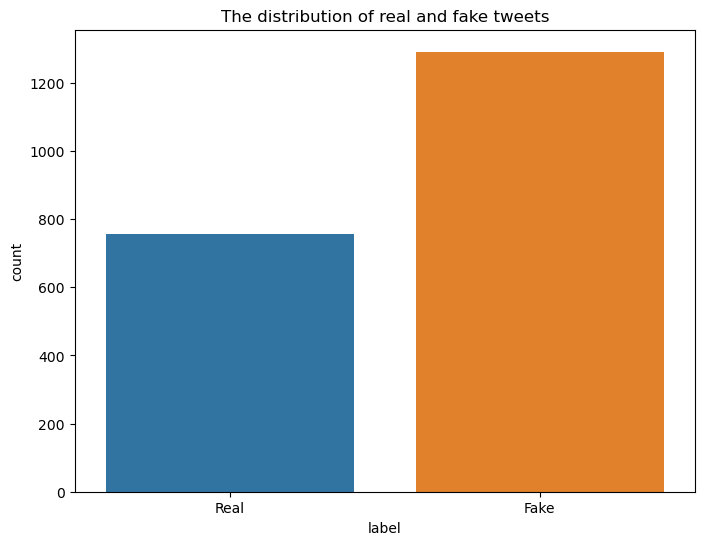

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df1, x='label')
plt.title('The distribution of real and fake tweets')

## EDA

In [ ]:
print(df1['text'][0])

print they should pay all the back all the money plus interest the entire family and everyone who came in with them need to be deported asap why did it take two years to bust them 
here we go again another group stealing from the government and taxpayers a group of somalis stole over four million in government benefits over just  months 
weve reported on numerous cases like this one where the muslim refugeesimmigrants commit fraud by scamming our systemits way out of control more related


In [ ]:
# Preprocess the text data
def preprocess_text(text):
    # Clean the text
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub(' +', ' ', text)
    text = text.lower()
    text = re.sub(r'\b(ha)+\b', '', text)
    text = text.replace('\n', ' ')

    return text.strip()

def tokenize_column(df, column):
    # create an empty list to store the tokenized text
    tokenized = []

    # iterate over each row in the specified column
    for idx, row in df.iterrows():
        # tokenize the text in the specified column
        tokens = word_tokenize(row[column])

        # remove stopwords from the tokenized text
        filtered_tokens = [x for x in tokens if x not in stopwords.words('english')]

        # join the filtered tokens back into a single string and append to the tokenized list
        tokenized.append(' '.join(filtered_tokens))

    # add the tokenized text as a new column to the DataFrame
    df['tokenized'] = tokenized

    # return the modified DataFrame
    return df

df1['cleaned']=df1['text'].apply(preprocess_text)

df1 = tokenize_column(df1, 'cleaned')

df1[['text', 'label', 'cleaned', 'tokenized']].head()

,text,label,cleaned,tokenized
0,print they should pay all the back all the mon...,Real,print they should pay all the back all the mon...,print pay back money plus interest entire fami...
1,why did attorney general loretta lynch plead t...,Real,why did attorney general loretta lynch plead t...,attorney general loretta lynch plead fifth bar...
2,red state \nfox news sunday reported this mor...,Real,red state fox news sunday reported this mornin...,red state fox news sunday reported morning ant...
3,email kayla mueller was a prisoner and torture...,Real,email kayla mueller was a prisoner and torture...,email kayla mueller prisoner tortured isis cha...
4,email healthcare reform to make america great ...,Real,email healthcare reform to make america great ...,email healthcare reform make america great sin...


In [ ]:
# Separate the features (tweets) and labels (true/false)
X = df1['tokenized']
y = df1['label']

# Reshape X to a 2D array
X = X.values.reshape(-1, 1)

# Create an instance of the RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Perform undersampling on the majority class
X_undersampled, y_undersampled = rus.fit_resample(X, y)

# Flatten the undersampled features to a 1D array
X_undersampled = np.squeeze(X_undersampled)

# Create a new DataFrame with the undersampled data
df_undersampled = pd.DataFrame({'tokenized': X_undersampled, 'label': y_undersampled})

Text(0.5, 1.0, 'The distribution of real and fake tweets')

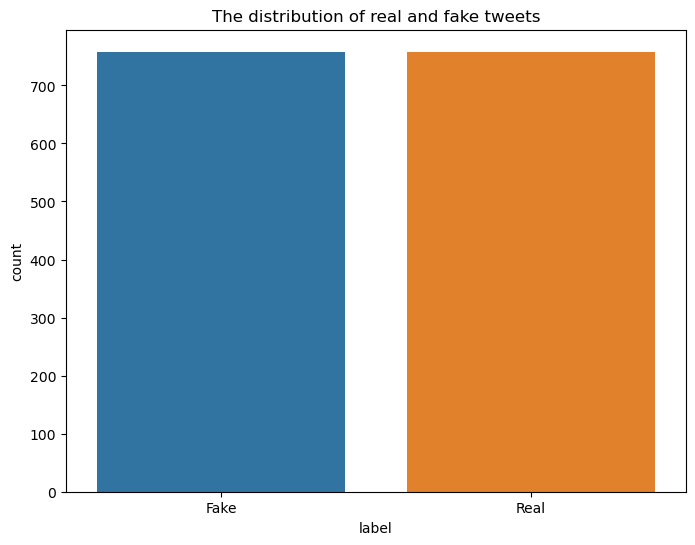

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_undersampled, x='label')
plt.title('The distribution of real and fake tweets')

### Wordclouds

In [ ]:
df1 = df1.drop(columns=['level_0', 'index','published'], axis =1)

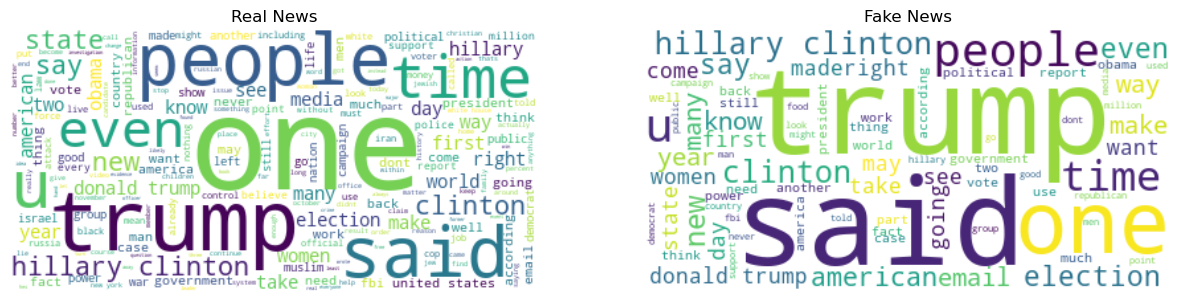

In [ ]:
df_corpus = df_undersampled

real_text = ' '.join(df_corpus[df_corpus['label']=='Real']['tokenized'].tolist())
fake_text = ' '.join(df_corpus[df_corpus['label']=='Fake']['tokenized'].tolist())

real_wordcloud = WordCloud(background_color='white').generate(real_text)
fake_wordcloud = WordCloud(background_color='white').generate(fake_text)

plt.figure(figsize=(15,7))
plt.subplot(1, 2, 1)
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Real News')

plt.subplot(1, 2, 2)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Fake News')

plt.show()

### Top 20 common words

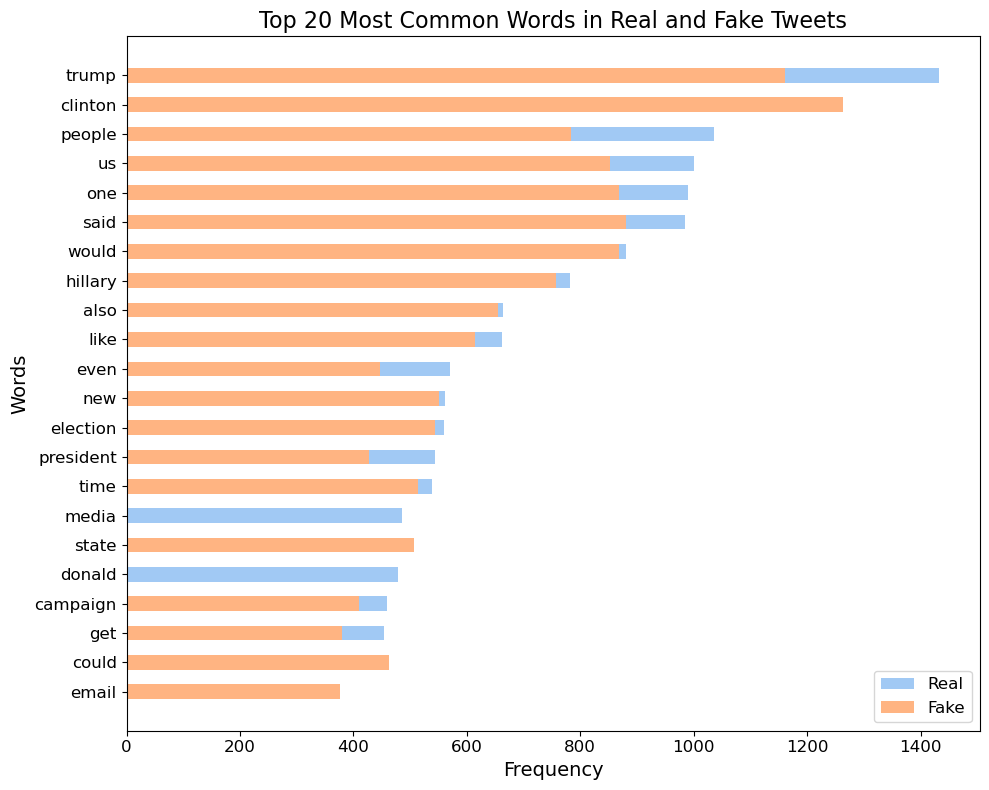

In [ ]:
colors = sns.color_palette('pastel', 2)

real_words = Counter(real_text.split()).most_common(20)
fake_words = Counter(fake_text.split()).most_common(20)

plt.figure(figsize=(10, 8))
plt.barh([x[0] for x in real_words], [x[1] for x in real_words], height=0.5, color= colors[0], label='Real')
plt.barh([x[0] for x in fake_words], [x[1] for x in fake_words], height=0.5, color= colors[1], label='Fake')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.title('Top 20 Most Common Words in Real and Fake Tweets', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Analisis of the text length

In [ ]:
df_corpus['tweet_length']=df_corpus['tokenized'].apply(lambda x: len(x))

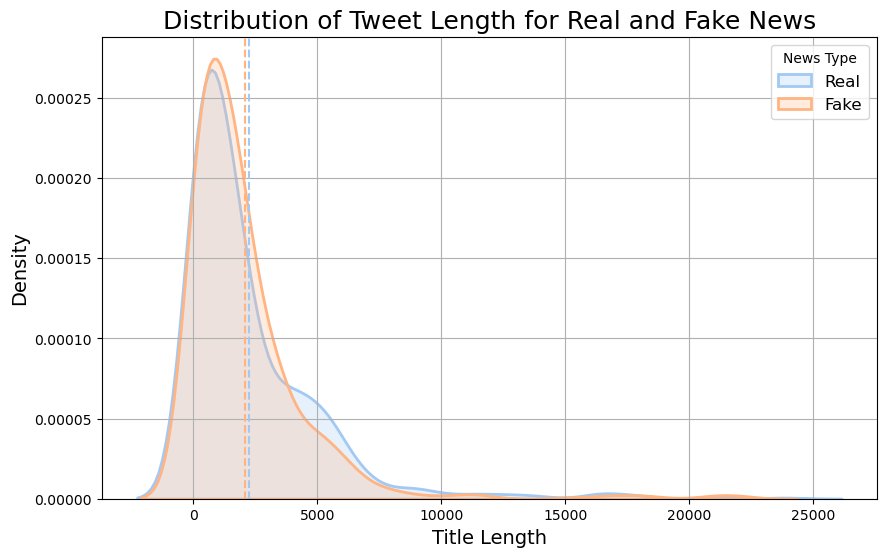

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_corpus[df_corpus['label'] == 'Real']['tweet_length'], color= colors[0], fill=True, label='Real', linewidth=2)
sns.kdeplot(df_corpus[df_corpus['label'] == 'Fake']['tweet_length'], color= colors[1], fill=True, label='Fake', linewidth=2)
plt.axvline(df_corpus[df_corpus['label'] == 'Real']['tweet_length'].mean(), color= colors[0], linestyle='--')
plt.axvline(df_corpus[df_corpus['label'] == 'Fake']['tweet_length'].mean(), color= colors[1], linestyle='--')
plt.xlabel('Title Length', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='News Type', fontsize=12, labels=['Real', 'Fake'])
plt.title('Distribution of Tweet Length for Real and Fake News', fontsize=18)
plt.grid()
plt.show()

## Test/train partition and ML tecniques

In [ ]:
X3=df_corpus['tokenized']
y3=df_corpus['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X3 ,y3, test_size=0.20, random_state = 777)
df1 = df_corpus

In [ ]:
def print_errors_report(df, X_test, y_test, y_pred):
    df = pd.DataFrame({'text': X_test, 'true_label': y_test, 'predicted_label': y_pred})
    misclassified_idx = df['true_label'] != df['predicted_label']
    misclassified = df[misclassified_idx]
    table = misclassified[['true_label', 'predicted_label', 'text']].reset_index(drop=True)
    table_styled = table.style.set_properties(**{'text-align': 'left'}).set_table_styles([{'selector': 'th', 'props': [('text-align', 'left')]}])
    print("Misclassified examples:")
    display(table_styled.data.head(20))

def run_model(dataset, model, X_train, y_train, X_test, y_test, param_grid, cv=5):
    # create a TfidfVectorizer object to convert text to numerical features
    tfidf = TfidfVectorizer()

    # convert text data to numerical features
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)

    # perform a grid search with cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv)
    grid_search.fit(X_train_tfidf, y_train)

    # use the best model to make predictions on the test data
    best_estimator = grid_search.best_estimator_
    y_pred = best_estimator.predict(X_test_tfidf)

    # print the classification report
    print("=" * 50)
    print("Classification Report for", model.__class__.__name__)
    print("=" * 50)
    print(" " * 50)
    print(classification_report(y_test, y_pred))

    print(" " * 50)
    print(" " * 50)

    print("=" * 50)
    print("Best hyperparameters for", model.__class__.__name__)
    print("=" * 50)
    print(" " * 50)

    # print the best estimator and its score on the test data
    score = grid_search.best_score_
    accuracy = best_estimator.score(X_test_tfidf, y_test)
    print("Best hyperparameters:", grid_search.best_params_)
    print("Best score:",score)
    print("Accuracy on test set:", accuracy)

    print(" " * 50)
    print(" " * 50)

    print("=" * 50)
    print("Confusion matrix and ROC curve for", model.__class__.__name__)
    print("=" * 50)
    print(" " * 50)

    # create a confusion matrix and plot it in the first subplot
    cm = confusion_matrix(y_test, y_pred)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    sns.heatmap(cm, annot=True, fmt='.0f', cmap="Blues", ax=ax1)
    ax1.set_xlabel("Predicted Labels")
    ax1.set_ylabel("True Labels")
    ax1.set_title("Confusion Matrix")

    # plot the ROC curve in the second subplot
    RocCurveDisplay.from_estimator(best_estimator, X_test_tfidf, y_test, ax=ax2)
    ax2.set_title('Receiver Operating Characteristic (ROC) Curve')

    # adjust the layout and show the figure
    plt.tight_layout()
    plt.show()

    print(" " * 50)
    print(" " * 50)

    print("=" * 50)
    print("Misclassified examples for", model.__class__.__name__)
    print("=" * 50)
    print(" " * 50)

    print_errors_report(dataset, X_test, y_test, y_pred)

    print(" " * 50)
    print(" " * 50)

    return accuracy, y_pred, best_estimator

### SVM

Classification Report for SVC
                                                  
              precision    recall  f1-score   support

        Fake       0.67      0.74      0.70       142
        Real       0.75      0.68      0.71       162

    accuracy                           0.71       304
   macro avg       0.71      0.71      0.71       304
weighted avg       0.71      0.71      0.71       304

                                                  
                                                  
Best hyperparameters for SVC
                                                  
Best hyperparameters: {'C': 10, 'class_weight': 'balanced', 'gamma': 1, 'kernel': 'rbf'}
Best score: 0.7310410502329694
Accuracy on test set: 0.7072368421052632
                                                  
                                                  
Confusion matrix and ROC curve for SVC
                                                  


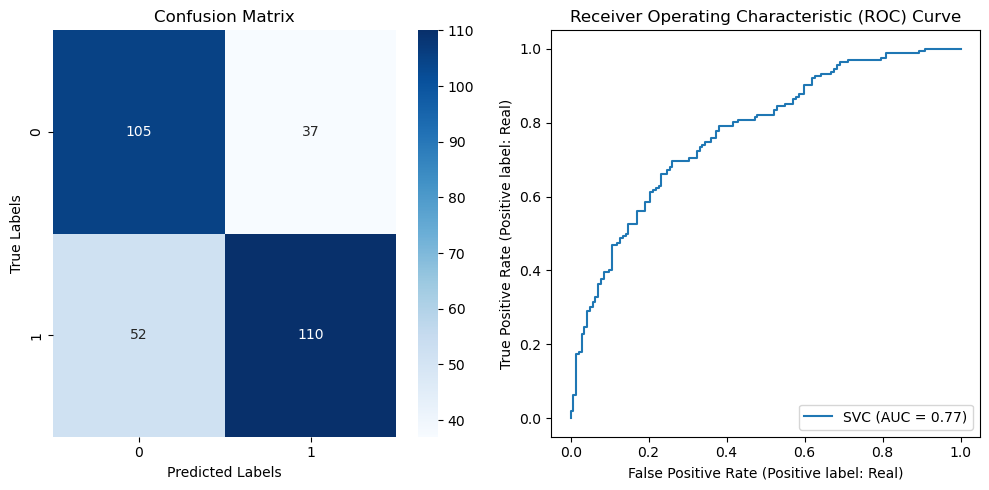

                                                  
                                                  
Misclassified examples for SVC
                                                  
Misclassified examples:


,true_label,predicted_label,text
0,Real,Fake,european media jihad geert wilders lose grip p...
1,Real,Fake,ayers right jail first corrupt sleezes exported
2,Real,Fake,polls rigged trump wildly divergent surveys po...
3,Real,Fake,un declares junk food human rights issue says ...
4,Real,Fake,two hollywood films men leave todays sjw movie...
5,Real,Fake,news bulletin iranian youngsters lost saudi ar...
6,Fake,Real,people kinds things really dont believe democr...
7,Fake,Real,feds warn nyc officials possible al qaeda atta...
8,Fake,Real,greatest trick feminism pulled convince masses...
9,Real,Fake,look gdi president didnt know sht doesnt know ...


In [ ]:
# define the SVM classifier
svm = SVC()

param_grid = {'kernel': ['linear', 'rbf'],
              'C': [0.1, 1, 10],
              'gamma': [0.1, 1],
              'class_weight': [None, 'balanced']}

# train and evaluate the model
accuracy_svm, y_pred_svm, svm = run_model(df1, svm, X_train, y_train, X_test, y_test, param_grid)

### MultinomialNB

Classification Report for MultinomialNB
                                                  
              precision    recall  f1-score   support

        Fake       0.72      0.55      0.62       142
        Real       0.67      0.81      0.73       162

    accuracy                           0.69       304
   macro avg       0.69      0.68      0.68       304
weighted avg       0.69      0.69      0.68       304

                                                  
                                                  
Best hyperparameters for MultinomialNB
                                                  
Best hyperparameters: {'alpha': 1, 'class_prior': None, 'fit_prior': True}
Best score: 0.6955684794068633
Accuracy on test set: 0.6875
                                                  
                                                  
Confusion matrix and ROC curve for MultinomialNB
                                                  


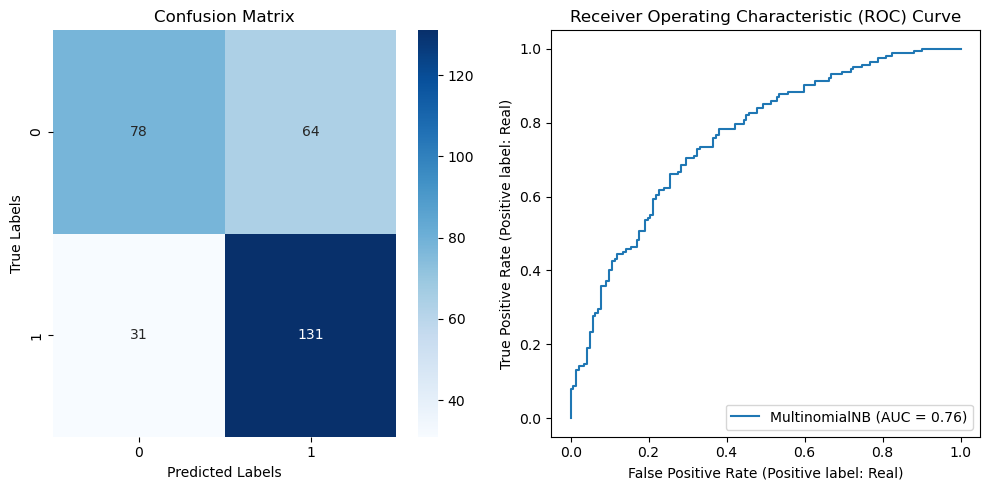

                                                  
                                                  
Misclassified examples for MultinomialNB
                                                  
Misclassified examples:


,true_label,predicted_label,text
0,Fake,Real,bill clinton sexaddicted monster mocked hillar...
1,Real,Fake,polls rigged trump wildly divergent surveys po...
2,Real,Fake,un declares junk food human rights issue says ...
3,Real,Fake,two hollywood films men leave todays sjw movie...
4,Fake,Real,feds warn nyc officials possible al qaeda atta...
5,Fake,Real,greatest trick feminism pulled convince masses...
6,Fake,Real,knew
7,Real,Fake,look gdi president didnt know sht doesnt know ...
8,Fake,Real,email whether youre basketball fan youre going...
9,Fake,Real,new clinton email scandal keeps getting worse ...


In [ ]:
# define the MultinomialNB classifier
nb = MultinomialNB()

param_grid = {'alpha': [0.1, 1, 10],
              'fit_prior': [True, False],
              'class_prior': [None, [0.3, 0.7], [0.4, 0.6]]}


# train and evaluate the model
accuracy_nb, y_pred_nb, nb = run_model(df1, nb, X_train, y_train, X_test, y_test,param_grid)

### RandomForestClassifier

Classification Report for RandomForestClassifier
                                                  
              precision    recall  f1-score   support

        Fake       0.70      0.79      0.74       142
        Real       0.79      0.70      0.75       162

    accuracy                           0.74       304
   macro avg       0.75      0.75      0.74       304
weighted avg       0.75      0.74      0.74       304

                                                  
                                                  
Best hyperparameters for RandomForestClassifier
                                                  
Best hyperparameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.7491786552392614
Accuracy on test set: 0.743421052631579
                                                  
                                                  
Confusion matrix and ROC curve for RandomForestClassifier
          

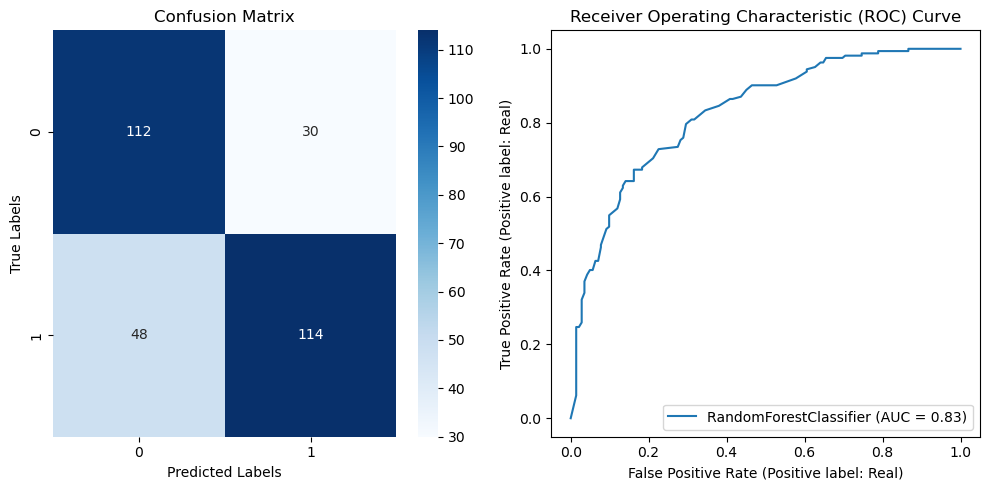

                                                  
                                                  
Misclassified examples for RandomForestClassifier
                                                  
Misclassified examples:


,true_label,predicted_label,text
0,Real,Fake,ayers right jail first corrupt sleezes exported
1,Real,Fake,polls rigged trump wildly divergent surveys po...
2,Real,Fake,go article theres scene end remarkably terribl...
3,Fake,Real,people kinds things really dont believe democr...
4,Fake,Real,feds warn nyc officials possible al qaeda atta...
5,Real,Fake,print hillary goes absolutely berserk explodes...
6,Real,Fake,look gdi president didnt know sht doesnt know ...
7,Fake,Real,new clinton email scandal keeps getting worse ...
8,Real,Fake,scumbags want try claim emails illegitimate st...
9,Fake,Real,catherine j frompovich part following testimon...


In [ ]:
# create a Random Forest object
rf = RandomForestClassifier(random_state=777)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, None],
    'min_samples_split': [2, 6],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

# train and evaluate the model
accuracy_rf, y_pred_rf, rf = run_model(df1, rf, X_train, y_train, X_test, y_test, param_grid)

### LogisticRegression

Classification Report for LogisticRegression
                                                  
              precision    recall  f1-score   support

        Fake       0.67      0.73      0.70       142
        Real       0.74      0.68      0.71       162

    accuracy                           0.70       304
   macro avg       0.70      0.71      0.70       304
weighted avg       0.71      0.70      0.70       304

                                                  
                                                  
Best hyperparameters for LogisticRegression
                                                  
Best hyperparameters: {'C': 1, 'class_weight': 'balanced', 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.001}
Best score: 0.7252661293065332
Accuracy on test set: 0.7039473684210527
                                                  
                                                  
Confusion matrix and ROC curve for LogisticRegression
    

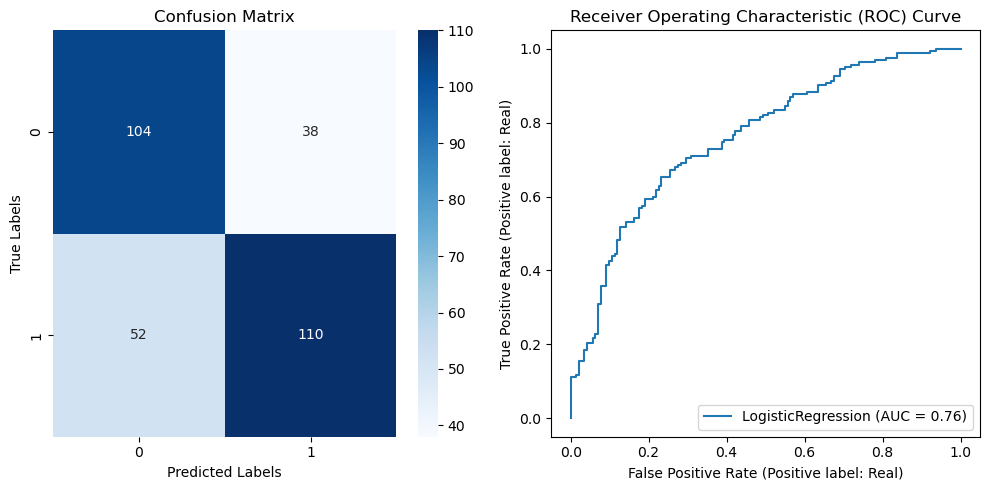

                                                  
                                                  
Misclassified examples for LogisticRegression
                                                  
Misclassified examples:


,true_label,predicted_label,text
0,Real,Fake,ayers right jail first corrupt sleezes exported
1,Real,Fake,polls rigged trump wildly divergent surveys po...
2,Real,Fake,un declares junk food human rights issue says ...
3,Real,Fake,two hollywood films men leave todays sjw movie...
4,Real,Fake,news bulletin iranian youngsters lost saudi ar...
5,Fake,Real,feds warn nyc officials possible al qaeda atta...
6,Fake,Real,greatest trick feminism pulled convince masses...
7,Real,Fake,print hillary goes absolutely berserk explodes...
8,Real,Fake,look gdi president didnt know sht doesnt know ...
9,Fake,Real,new clinton email scandal keeps getting worse ...


In [ ]:
# create a Logistic Regression object
lr = LogisticRegression()

param_grid = {
    'C': [0.1, 1],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'fit_intercept': [True, False],
    'class_weight': [None, 'balanced'],
    'max_iter': [100, 500],
    'tol': [1e-3, 1e-4]
}

# train and evaluate the model
accuracy_lr, y_pred_lr, lr = run_model(df1, lr, X_train, y_train, X_test, y_test, param_grid)

### GradientBoostingClassifier

Classification Report for GradientBoostingClassifier
                                                  
              precision    recall  f1-score   support

        Fake       0.71      0.82      0.76       142
        Real       0.82      0.71      0.76       162

    accuracy                           0.76       304
   macro avg       0.77      0.77      0.76       304
weighted avg       0.77      0.76      0.76       304

                                                  
                                                  
Best hyperparameters for GradientBoostingClassifier
                                                  
Best hyperparameters: {'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 5, 'n_estimators': 100}
Best score: 0.7648709315375981
Accuracy on test set: 0.7631578947368421
                                                  
                                                  
Confusion matrix and ROC curve for GradientBoostingClassifier
                       

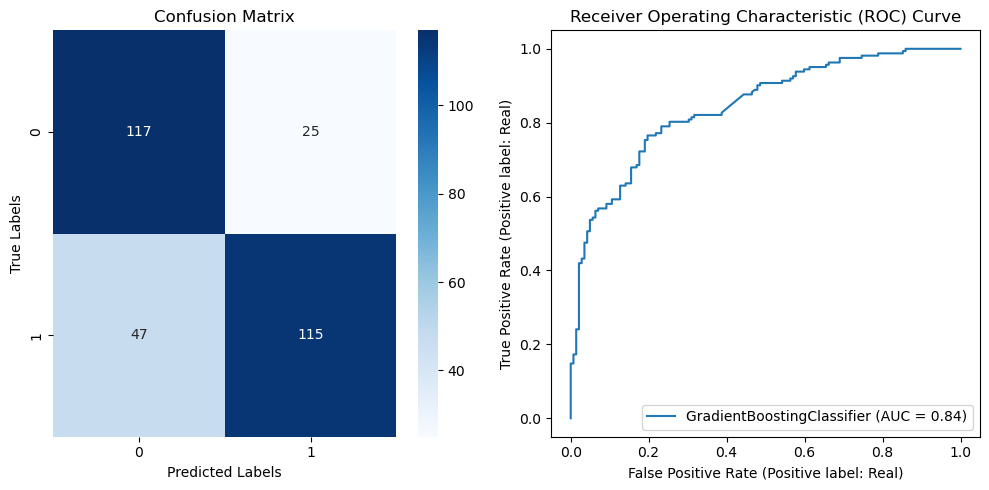

                                                  
                                                  
Misclassified examples for GradientBoostingClassifier
                                                  
Misclassified examples:


,true_label,predicted_label,text
0,Real,Fake,ayers right jail first corrupt sleezes exported
1,Real,Fake,polls rigged trump wildly divergent surveys po...
2,Real,Fake,david rives archive david rives known presenta...
3,Fake,Real,people kinds things really dont believe democr...
4,Real,Fake,look gdi president didnt know sht doesnt know ...
5,Fake,Real,new clinton email scandal keeps getting worse ...
6,Real,Fake,scumbags want try claim emails illegitimate st...
7,Real,Fake,actually pick axhes lawyer activist says arres...
8,Fake,Real,catherine j frompovich part following testimon...
9,Real,Fake,total idiot ever get job oh forgot working


In [ ]:
# define the Gradient Boosting classifier object
gb = GradientBoostingClassifier(random_state=777)

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'loss': ['log_loss', 'exponential']
}

# train and evaluate the model
accuracy_gb, y_pred_gb, gb = run_model(df1, gb, X_train, y_train, X_test, y_test, param_grid)

### KNeighborsClassifier

Classification Report for KNeighborsClassifier
                                                  
              precision    recall  f1-score   support

        Fake       0.65      0.65      0.65       142
        Real       0.70      0.70      0.70       162

    accuracy                           0.68       304
   macro avg       0.68      0.68      0.68       304
weighted avg       0.68      0.68      0.68       304

                                                  
                                                  
Best hyperparameters for KNeighborsClassifier
                                                  
Best hyperparameters: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
Best score: 0.6526170798898072
Accuracy on test set: 0.6776315789473685
                                                  
                                                  
Confusion matrix and ROC curve for KNeighborsClassifier
             

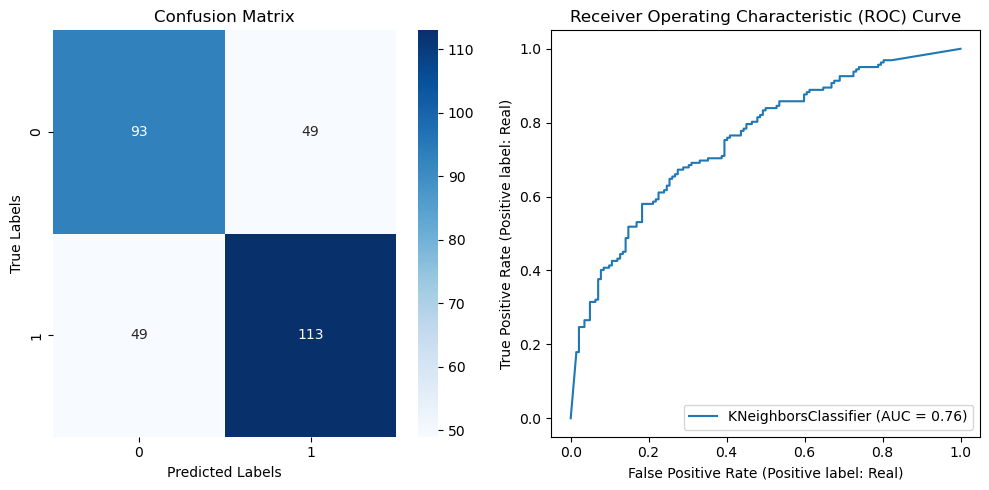

                                                  
                                                  
Misclassified examples for KNeighborsClassifier
                                                  
Misclassified examples:


,true_label,predicted_label,text
0,Real,Fake,european media jihad geert wilders lose grip p...
1,Fake,Real,new york post michael gartland de blasio admin...
2,Real,Fake,un declares junk food human rights issue says ...
3,Fake,Real,amanda froelich worlds population estimated re...
4,Real,Fake,two hollywood films men leave todays sjw movie...
5,Real,Fake,news bulletin iranian youngsters lost saudi ar...
6,Fake,Real,people kinds things really dont believe democr...
7,Fake,Real,email times made reference thursday suffering ...
8,Fake,Real,greatest trick feminism pulled convince masses...
9,Fake,Real,knew


In [ ]:
# create a KNN object
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': [3, 5],
              'weights': ['uniform', 'distance'],
              'p': [1, 2],
              'algorithm': ['auto', 'ball_tree'],
              'leaf_size': [10, 20],
              'metric': ['minkowski', 'cosine']}

# train and evaluate the model
accuracy_knn, y_pred_knn, knn = run_model(df1, knn, X_train, y_train, X_test, y_test, param_grid)

### Pasive Agressive Classifier

Classification Report for PassiveAggressiveClassifier
                                                  
              precision    recall  f1-score   support

        Fake       0.66      0.73      0.69       142
        Real       0.74      0.68      0.71       162

    accuracy                           0.70       304
   macro avg       0.70      0.70      0.70       304
weighted avg       0.70      0.70      0.70       304

                                                  
                                                  
Best hyperparameters for PassiveAggressiveClassifier
                                                  
Best hyperparameters: {'C': 1, 'early_stopping': False, 'fit_intercept': False, 'loss': 'hinge', 'max_iter': 100, 'shuffle': True, 'tol': 0.0001, 'validation_fraction': 0.2}
Best score: 0.7285787164575044
Accuracy on test set: 0.7006578947368421
                                                  
                                                  
Confusion matr

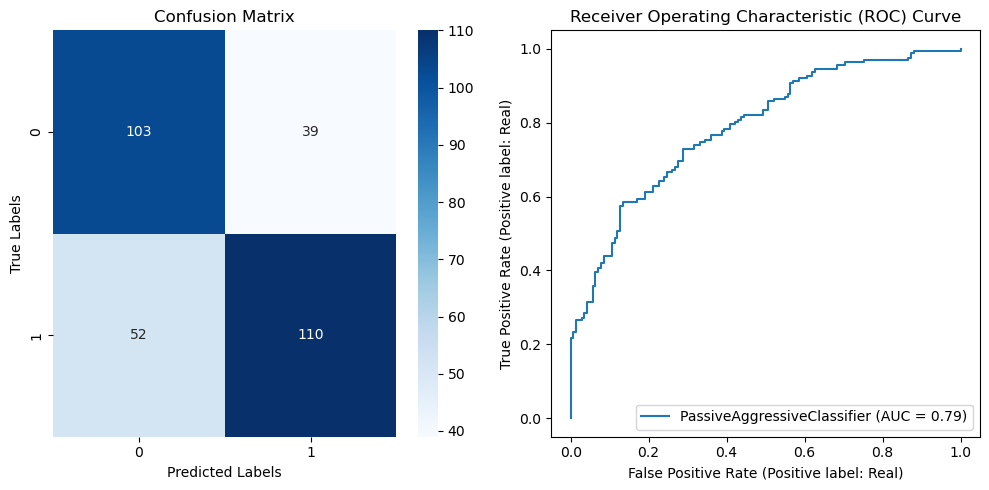

                                                  
                                                  
Misclassified examples for PassiveAggressiveClassifier
                                                  
Misclassified examples:


,true_label,predicted_label,text
0,Real,Fake,european media jihad geert wilders lose grip p...
1,Real,Fake,ayers right jail first corrupt sleezes exported
2,Real,Fake,polls rigged trump wildly divergent surveys po...
3,Real,Fake,un declares junk food human rights issue says ...
4,Real,Fake,two hollywood films men leave todays sjw movie...
5,Real,Fake,news bulletin iranian youngsters lost saudi ar...
6,Fake,Real,people kinds things really dont believe democr...
7,Fake,Real,greatest trick feminism pulled convince masses...
8,Real,Fake,look gdi president didnt know sht doesnt know ...
9,Fake,Real,new clinton email scandal keeps getting worse ...


In [ ]:
# Create a PassiveAggressiveClassifier model
pac = PassiveAggressiveClassifier()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'max_iter': [100, 1000, 10000],
    'tol': [1e-4, 1e-5],
    'fit_intercept': [True, False],
    'shuffle': [True, False],
    'loss': ['hinge', 'squared_hinge'],
    'early_stopping': [True, False],
    'validation_fraction': [0.1, 0.2],
}

# train and evaluate the model
accuracy_pac, y_pred_pac, pac = run_model(df1, pac, X_train, y_train, X_test, y_test,param_grid)

### Results

In [ ]:
results_dict = {'SVM': {'accuracy': accuracy_svm},
'Random Forest': {'accuracy': accuracy_rf},
'Naive Bayes': {'accuracy': accuracy_nb},
'Logistic Regression': {'accuracy': accuracy_lr},
'Gradient Boosting': {'accuracy': accuracy_gb},
'K-Nearest Neighbors': {'accuracy': accuracy_knn},
'Passive Agressive clasifier': {'accuracy': accuracy_pac}}

results_df = pd.DataFrame(results_dict).transpose().sort_values('accuracy', ascending=False)

display(HTML(results_df.to_html()))

,accuracy
Gradient Boosting,0.763158
Random Forest,0.743421
SVM,0.707237
Logistic Regression,0.703947
Passive Agressive clasifier,0.700658
Naive Bayes,0.687500
K-Nearest Neighbors,0.677632


## Attention models

In [ ]:
sentences = df_undersampled['tokenized'].astype(str).str.lower().values.tolist()
labels = df_undersampled['label'].values.tolist()
labels = np.array([1 if label == "Fake" else 0 for label in labels])

# Shuffle the sentences and labels together
shuffled_sentences, shuffled_labels = shuffle(sentences, labels, random_state=42)

len(shuffled_sentences)

1516

In [ ]:
# Split the data into train and test sets, maintaining the class proportions
training_sentences, testing_sentences, training_labels, testing_labels = train_test_split(
    shuffled_sentences, shuffled_labels, test_size=0.2, stratify=shuffled_labels, random_state=42
)

# Check the lengths of the train and test sets
print("Train set length:", len(training_sentences))
print("Test set length:", len(testing_sentences))

Train set length: 1212
Test set length: 304


In [ ]:
# Hyperparameters
vocab_size = 10000
embedding_dim = 100  # Increased embedding dimension
max_length = 150  # Increased maximum sequence length
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

# Tokenization and Padding
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
print('Total words:', len(word_index))

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

Total words: 39077


In [ ]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

### MLP

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 100)          1000000   
                                                                 
 flatten (Flatten)           (None, 15000)             0         
                                                                 
 dense (Dense)               (None, 128)               1920128   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 6

In [ ]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
38/38 - 2s - loss: 0.6910 - accuracy: 0.5297 - val_loss: 0.6644 - val_accuracy: 0.6151 - 2s/epoch - 63ms/step
Epoch 2/30
38/38 - 1s - loss: 0.3583 - accuracy: 0.8903 - val_loss: 0.7690 - val_accuracy: 0.6447 - 596ms/epoch - 16ms/step
Epoch 3/30
38/38 - 1s - loss: 0.0848 - accuracy: 0.9769 - val_loss: 0.6064 - val_accuracy: 0.7204 - 580ms/epoch - 15ms/step
Epoch 4/30
38/38 - 1s - loss: 0.0305 - accuracy: 0.9926 - val_loss: 0.6788 - val_accuracy: 0.7105 - 552ms/epoch - 15ms/step
Epoch 5/30
38/38 - 1s - loss: 0.0126 - accuracy: 0.9967 - val_loss: 0.6709 - val_accuracy: 0.6974 - 591ms/epoch - 16ms/step
Epoch 6/30
38/38 - 1s - loss: 0.0086 - accuracy: 0.9950 - val_loss: 0.7018 - val_accuracy: 0.7171 - 570ms/epoch - 15ms/step
Epoch 7/30
38/38 - 1s - loss: 0.0087 - accuracy: 0.9959 - val_loss: 0.7090 - val_accuracy: 0.7105 - 593ms/epoch - 16ms/step
Epoch 8/30
38/38 - 1s - loss: 0.0073 - accuracy: 0.9950 - val_loss: 0.7040 - val_accuracy: 0.7105 - 587ms/epoch - 15ms/step
Epoch 9/30


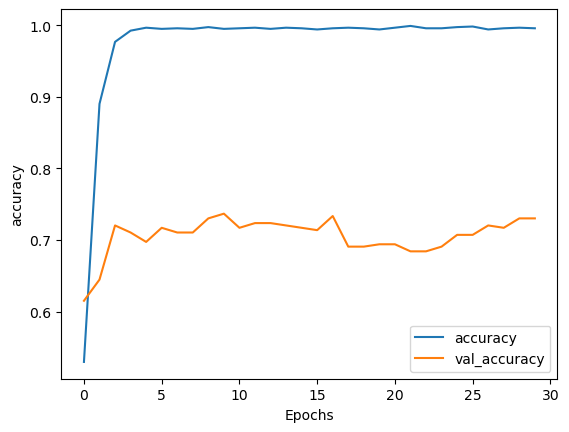

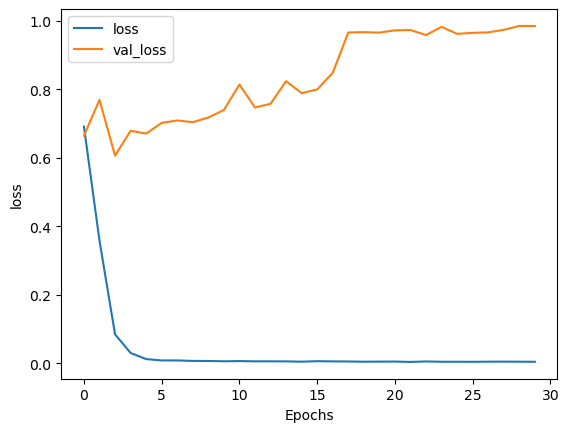

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
mlp_loss, mlp_acc =model.evaluate(testing_padded, testing_labels)

10/10 [==============================] - 0s 3ms/step - loss: 0.9846 - accuracy: 0.7303


### LSTM

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(LSTM(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(LSTM(32)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

print(model.summary())

2023-06-23 00:22:08.399023: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-23 00:22:08.401347: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-23 00:22:08.402880: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 bidirectional (Bidirectiona  (None, 150, 64)          34048     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 24)                1560      
                                                                 
 dropout_3 (Dropout)         (None, 24)               

2023-06-23 00:22:09.096808: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-23 00:22:09.098613: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-23 00:22:09.100243: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [ ]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30


2023-06-23 00:22:09.514701: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-23 00:22:09.516749: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-23 00:22:09.518346: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

38/38 - 12s - loss: 0.6869 - accuracy: 0.5767 - val_loss: 0.6661 - val_accuracy: 0.6414 - 12s/epoch - 307ms/step
Epoch 2/30
38/38 - 4s - loss: 0.4341 - accuracy: 0.8424 - val_loss: 0.5868 - val_accuracy: 0.7171 - 4s/epoch - 96ms/step
Epoch 3/30
38/38 - 4s - loss: 0.1128 - accuracy: 0.9711 - val_loss: 0.9445 - val_accuracy: 0.7039 - 4s/epoch - 100ms/step
Epoch 4/30
38/38 - 4s - loss: 0.0525 - accuracy: 0.9901 - val_loss: 0.8415 - val_accuracy: 0.7237 - 4s/epoch - 97ms/step
Epoch 5/30
38/38 - 4s - loss: 0.0464 - accuracy: 0.9884 - val_loss: 0.7914 - val_accuracy: 0.7105 - 4s/epoch - 100ms/step
Epoch 6/30
38/38 - 4s - loss: 0.0372 - accuracy: 0.9926 - val_loss: 1.0802 - val_accuracy: 0.7105 - 4s/epoch - 101ms/step
Epoch 7/30
38/38 - 4s - loss: 0.0275 - accuracy: 0.9917 - val_loss: 0.8982 - val_accuracy: 0.7204 - 4s/epoch - 110ms/step
Epoch 8/30
38/38 - 4s - loss: 0.0213 - accuracy: 0.9926 - val_loss: 0.9576 - val_accuracy: 0.7237 - 4s/epoch - 110ms/step
Epoch 9/30
38/38 - 4s - loss: 0.017

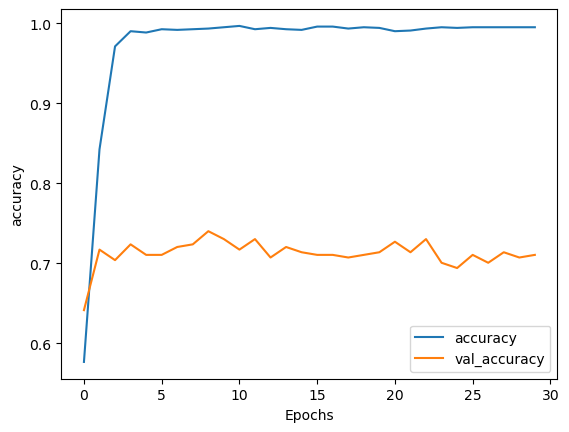

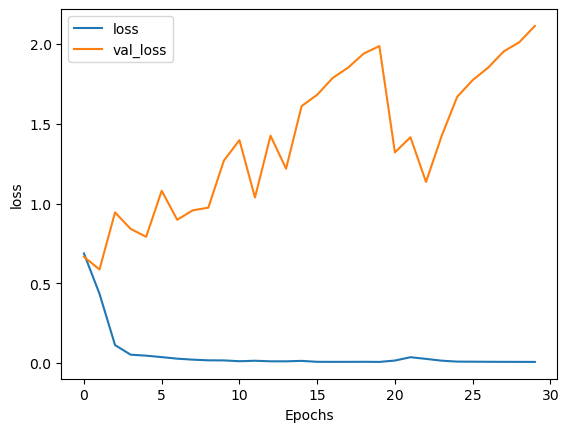

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
lstm_loss, lstm_acc =model.evaluate(testing_padded, testing_labels)

10/10 [==============================] - 0s 27ms/step - loss: 2.1136 - accuracy: 0.7105


### CNN

In [ ]:
model_CNN = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_CNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model_CNN.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 conv1d (Conv1D)             (None, 146, 128)          64128     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                      

In [ ]:
num_epochs = 30
history = model_CNN.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
38/38 - 2s - loss: 0.6906 - accuracy: 0.5140 - val_loss: 0.6820 - val_accuracy: 0.5724 - 2s/epoch - 54ms/step
Epoch 2/30
38/38 - 1s - loss: 0.6333 - accuracy: 0.7261 - val_loss: 0.6463 - val_accuracy: 0.6480 - 999ms/epoch - 26ms/step
Epoch 3/30
38/38 - 1s - loss: 0.4604 - accuracy: 0.9266 - val_loss: 0.5728 - val_accuracy: 0.7171 - 1s/epoch - 27ms/step
Epoch 4/30
38/38 - 1s - loss: 0.1983 - accuracy: 0.9794 - val_loss: 0.5301 - val_accuracy: 0.7467 - 959ms/epoch - 25ms/step
Epoch 5/30
38/38 - 1s - loss: 0.0700 - accuracy: 0.9884 - val_loss: 0.5342 - val_accuracy: 0.7303 - 932ms/epoch - 25ms/step
Epoch 6/30
38/38 - 1s - loss: 0.0474 - accuracy: 0.9917 - val_loss: 0.5255 - val_accuracy: 0.7434 - 932ms/epoch - 25ms/step
Epoch 7/30
38/38 - 1s - loss: 0.0402 - accuracy: 0.9926 - val_loss: 0.5521 - val_accuracy: 0.7533 - 918ms/epoch - 24ms/step
Epoch 8/30
38/38 - 1s - loss: 0.0256 - accuracy: 0.9959 - val_loss: 0.5398 - val_accuracy: 0.7566 - 957ms/epoch - 25ms/step
Epoch 9/30
38/

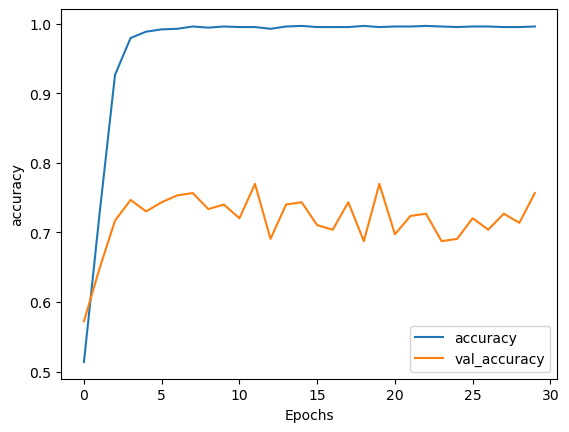

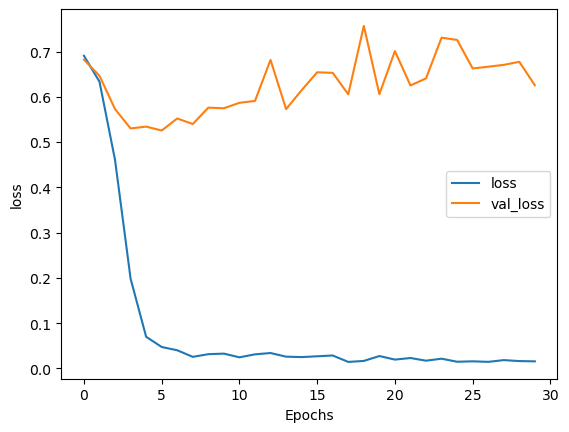

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
cnn_loss, cnn_acc =model_CNN.evaluate(testing_padded, testing_labels)

10/10 [==============================] - 0s 6ms/step - loss: 0.6256 - accuracy: 0.7566


10/10 [==============================] - 0s 5ms/step


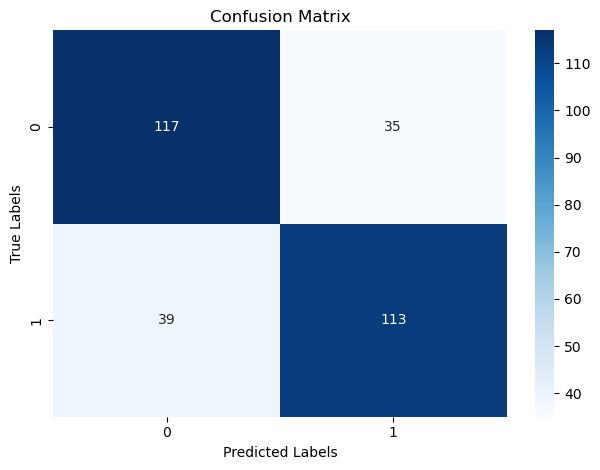

In [ ]:
predicted_probabilities = model_CNN.predict(testing_padded)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Compute the confusion matrix
confusion_matrix = tf.math.confusion_matrix(testing_labels, predicted_labels)

# Create a heatmap of the confusion matrix
ax = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")

# Set labels, title, and adjust layout
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("Confusion Matrix")
plt.tight_layout()

# Display the plot
plt.show()

10/10 [==============================] - 0s 5ms/step


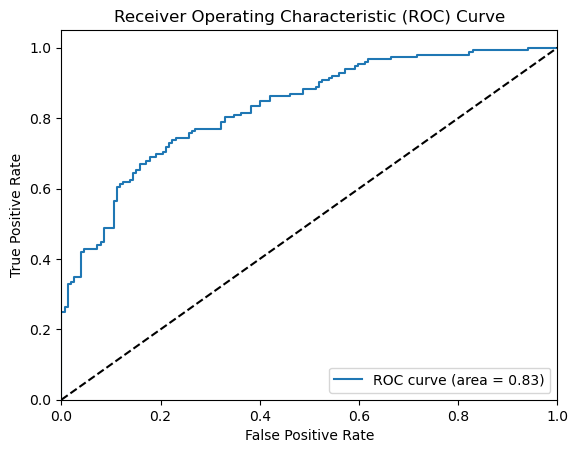

In [ ]:
predicted_probabilities = model_CNN.predict(testing_padded)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(testing_labels, predicted_probabilities)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Plot a diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### BiLSTM

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

2023-06-23 00:24:52.076276: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-23 00:24:52.078019: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-23 00:24:52.079796: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 bidirectional_2 (Bidirectio  (None, 150, 64)          34048     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 24)                1560      
                                                                 
 dropout_6 (Dropout)         (None, 24)               

2023-06-23 00:24:52.755874: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-23 00:24:52.757761: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-23 00:24:52.759202: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [ ]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30


2023-06-23 00:24:53.126952: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-23 00:24:53.128700: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-23 00:24:53.130539: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

38/38 - 12s - loss: 0.6904 - accuracy: 0.5767 - val_loss: 0.6786 - val_accuracy: 0.6743 - 12s/epoch - 304ms/step
Epoch 2/30
38/38 - 4s - loss: 0.4787 - accuracy: 0.8061 - val_loss: 0.5266 - val_accuracy: 0.7500 - 4s/epoch - 108ms/step
Epoch 3/30
38/38 - 4s - loss: 0.1420 - accuracy: 0.9604 - val_loss: 0.6967 - val_accuracy: 0.7303 - 4s/epoch - 100ms/step
Epoch 4/30
38/38 - 4s - loss: 0.0638 - accuracy: 0.9843 - val_loss: 0.7605 - val_accuracy: 0.7434 - 4s/epoch - 101ms/step
Epoch 5/30
38/38 - 4s - loss: 0.0444 - accuracy: 0.9876 - val_loss: 0.8611 - val_accuracy: 0.7434 - 4s/epoch - 102ms/step
Epoch 6/30
38/38 - 4s - loss: 0.0402 - accuracy: 0.9901 - val_loss: 0.8078 - val_accuracy: 0.7664 - 4s/epoch - 105ms/step
Epoch 7/30
38/38 - 4s - loss: 0.0289 - accuracy: 0.9934 - val_loss: 1.0565 - val_accuracy: 0.7467 - 4s/epoch - 106ms/step
Epoch 8/30
38/38 - 4s - loss: 0.0285 - accuracy: 0.9917 - val_loss: 1.1032 - val_accuracy: 0.7566 - 4s/epoch - 105ms/step
Epoch 9/30
38/38 - 4s - loss: 0.0

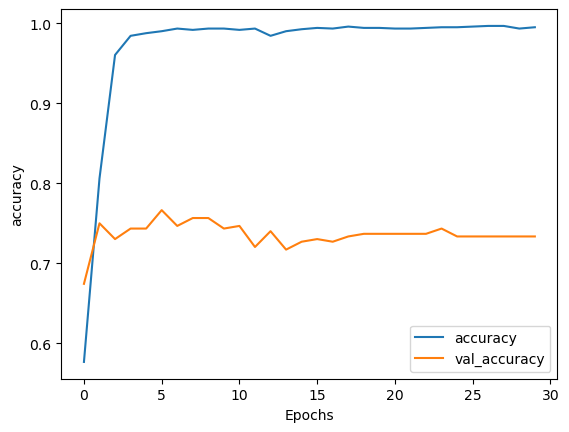

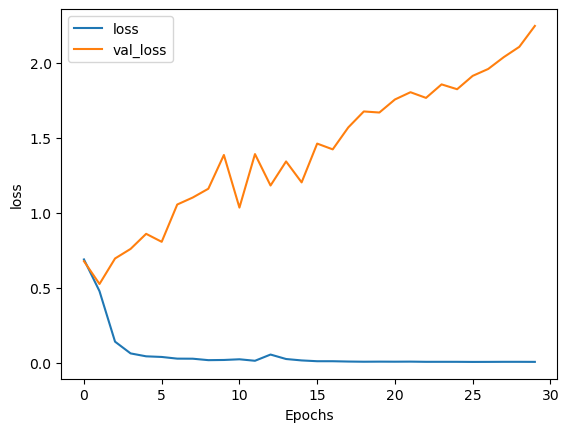

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
bilstm_loss, bilstm_acc =model.evaluate(testing_padded, testing_labels)

10/10 [==============================] - 0s 26ms/step - loss: 2.2473 - accuracy: 0.7336


### RNN

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.SimpleRNN(64, return_sequences=True),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 150, 64)           10560     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,023,041
Trainable params: 1,023,041
No

In [ ]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
38/38 - 4s - loss: 0.7217 - accuracy: 0.4901 - val_loss: 0.6985 - val_accuracy: 0.4803 - 4s/epoch - 114ms/step
Epoch 2/30
38/38 - 2s - loss: 0.6714 - accuracy: 0.5668 - val_loss: 0.7218 - val_accuracy: 0.4967 - 2s/epoch - 57ms/step
Epoch 3/30
38/38 - 2s - loss: 0.5116 - accuracy: 0.7434 - val_loss: 0.7589 - val_accuracy: 0.4901 - 2s/epoch - 55ms/step
Epoch 4/30
38/38 - 2s - loss: 0.3216 - accuracy: 0.8127 - val_loss: 0.9323 - val_accuracy: 0.5066 - 2s/epoch - 54ms/step
Epoch 5/30
38/38 - 2s - loss: 0.2955 - accuracy: 0.8408 - val_loss: 1.0597 - val_accuracy: 0.5033 - 2s/epoch - 53ms/step
Epoch 6/30
38/38 - 2s - loss: 0.2898 - accuracy: 0.8218 - val_loss: 1.1789 - val_accuracy: 0.4868 - 2s/epoch - 52ms/step
Epoch 7/30
38/38 - 2s - loss: 0.2889 - accuracy: 0.8119 - val_loss: 1.3033 - val_accuracy: 0.4770 - 2s/epoch - 49ms/step
Epoch 8/30
38/38 - 2s - loss: 0.2644 - accuracy: 0.8408 - val_loss: 1.2504 - val_accuracy: 0.4934 - 2s/epoch - 48ms/step
Epoch 9/30
38/38 - 2s - loss: 0

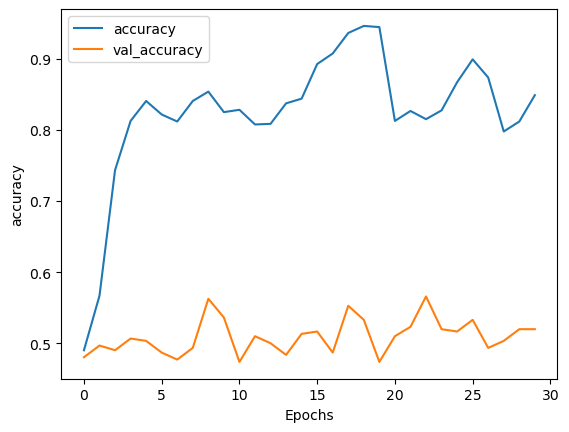

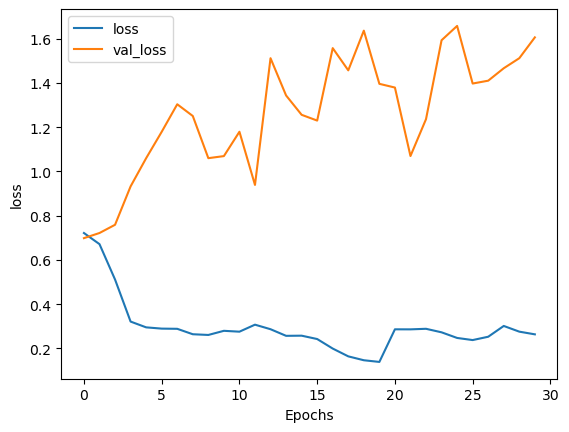

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
rnn_loss, rnn_acc =model.evaluate(testing_padded, testing_labels)

10/10 [==============================] - 0s 12ms/step - loss: 1.6056 - accuracy: 0.5197


10/10 [==============================] - 0s 13ms/step


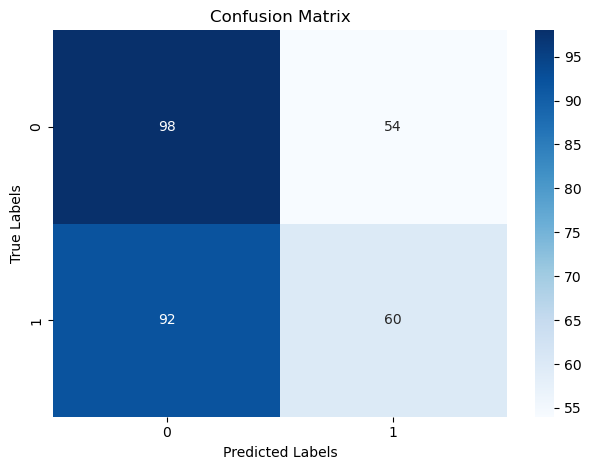

In [ ]:
predicted_probabilities = model.predict(testing_padded)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Compute the confusion matrix
confusion_matrix = tf.math.confusion_matrix(testing_labels, predicted_labels)

# Create a heatmap of the confusion matrix
ax = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")

# Set labels, title, and adjust layout
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("Confusion Matrix")
plt.tight_layout()

# Display the plot
plt.show()


10/10 [==============================] - 0s 13ms/step


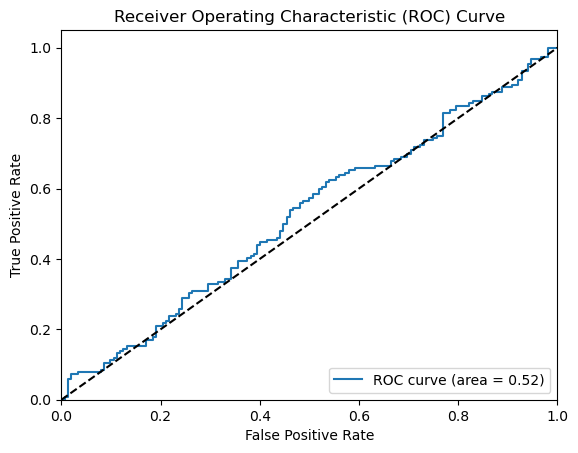

In [ ]:
predicted_probabilities = model.predict(testing_padded)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(testing_labels, predicted_probabilities)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Plot a diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Resultados

In [ ]:
results_dict = {'LSTM': {'accuracy': lstm_acc, 'loss': lstm_loss},
                'BiLSTM': {'accuracy': bilstm_acc, 'loss': bilstm_loss},
                'CNN': {'accuracy': cnn_acc, 'loss': cnn_loss},
                'RNN': {'accuracy': rnn_acc, 'loss': rnn_loss},
                'MLP': {'accuracy': mlp_acc, 'loss': mlp_loss}}

results_df = pd.DataFrame(results_dict).transpose().sort_values('accuracy', ascending=False)

display(HTML(results_df.to_html()))

,accuracy,loss
CNN,0.756579,0.625562
BiLSTM,0.733553,2.247254
MLP,0.730263,0.984588
LSTM,0.710526,2.113588
RNN,0.519737,1.605597


## Transformer: BERT

In [ ]:
df1 = pd.read_csv('/Users/alvarocaminamagro/Documents/Datasets_estudio/news_articles.csv', delimiter=',')
df1.dataframeName = 'news_articles.csv'

# Remove rows with NaN values
df1.dropna(inplace=True)
df1 = df1.reset_index()

In [ ]:
df1_bert = df1[["text","label"]]
df1_bert['label'] = df1['label'].map({'Real':0, 'Fake':1})
df1_bert.sample(5)

,text,label
111,its a disgrace they have wrecked the fbi its...,1
171,tonopah test range google earth imagery page ...,1
1768,what motivates you to live what is the meaning...,0
74,georg soros the good oil httpmailstarnetsoros...,1
1472,the photo taken on october shows destruction...,0


In [ ]:
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = TFBertModel.from_pretrained('bert-base-uncased')
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
data_text = df1_bert["text"]
data_label = df1_bert["label"]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(data_text, data_label, stratify = data_label, test_size = 0.2, random_state =42)

In [ ]:
def tokenize(X):

    X = bert_tokenizer(
        text = list(X),
        add_special_tokens = True,
        max_length = 100,
        truncation = True,
        padding = 'max_length',
        return_tensors = 'tf',
        return_token_type_ids = False,
        return_attention_mask = True,
        verbose = True
        )
    return X

In [ ]:
X_train_token = tokenize(X_train)
X_test_token = tokenize(X_test)

In [ ]:
max_length = 100

def create_model():
    dropout_rate=0.2
    input_ids=Input(shape=(max_length,),dtype=tf.int32)
    input_mask=Input(shape=(max_length,),dtype=tf.int32)
    bert_layer=bert_model([input_ids,input_mask])[1]
    x=Dropout(0.5)(bert_layer)
    x=Dense(64,activation="tanh")(x)
    x=Dropout(0.2)(x)
    x=Dense(1,activation="sigmoid")(x)
    model = Model(inputs=[input_ids, input_mask], outputs=x)
    return model

model_bert = create_model()
model_bert.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 tf_bert_model_1 (TFBertModel)  TFBaseModelOutputWi  109482240   ['input_3[0][0]',                
                                thPoolingAndCrossAt               'input_4[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 100,                                         

In [ ]:
optimizer = Adam(learning_rate=1e-05, epsilon=1e-08, clipnorm=1.0)
model_bert.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = 'accuracy')

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='max', verbose=1, patience=50,baseline=0.4,min_delta=0.0001,restore_best_weights=False)

In [ ]:
history = model_bert.fit(x = {'input_3':X_train_token['input_ids'],'input_4':X_train_token['attention_mask']}, y = Y_train, epochs=10, validation_split = 0.2, batch_size = 30, callbacks=[callback])

Epoch 1/10
44/44 [==============================] - 1291s 28s/step - loss: 0.7375 - accuracy: 0.5451 - val_loss: 0.6369 - val_accuracy: 0.6555
Epoch 2/10
44/44 [==============================] - 1265s 29s/step - loss: 0.6997 - accuracy: 0.5780 - val_loss: 0.6102 - val_accuracy: 0.6585
Epoch 3/10
44/44 [==============================] - 1271s 29s/step - loss: 0.6707 - accuracy: 0.6216 - val_loss: 0.5778 - val_accuracy: 0.6951
Epoch 4/10
44/44 [==============================] - 1233s 28s/step - loss: 0.6222 - accuracy: 0.6346 - val_loss: 0.5373 - val_accuracy: 0.7012
Epoch 5/10
44/44 [==============================] - 1278s 29s/step - loss: 0.5311 - accuracy: 0.7187 - val_loss: 0.4927 - val_accuracy: 0.7348
Epoch 6/10
44/44 [==============================] - 1333s 30s/step - loss: 0.4164 - accuracy: 0.8050 - val_loss: 0.5072 - val_accuracy: 0.7561
Epoch 7/10
44/44 [==============================] - 37425s 870s/step - loss: 0.2809 - accuracy: 0.8792 - val_loss: 0.5474 - val_accuracy: 0.77

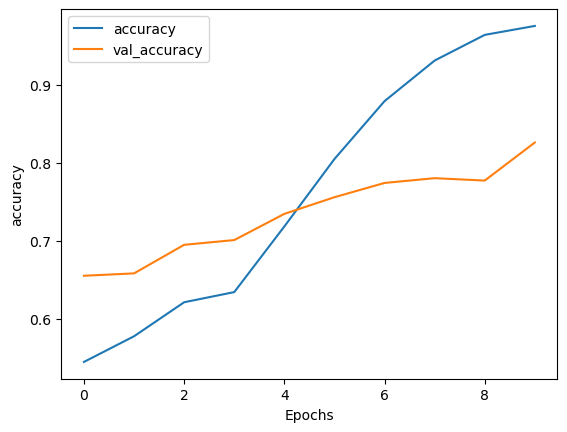

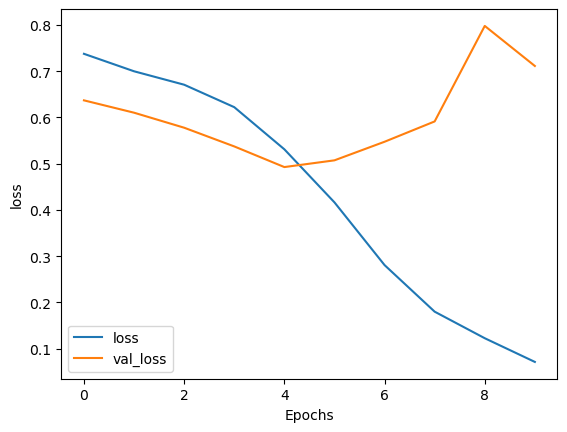

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

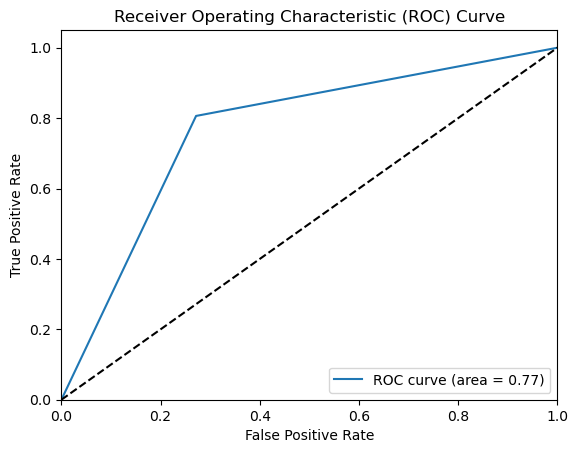

In [ ]:
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Plot a diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_bert.evaluate([X_test_token['input_ids'], X_test_token['attention_mask']], Y_test)

# Print the test loss and accuracy
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

13/13 [==============================] - 129s 9s/step - loss: 0.8244 - accuracy: 0.7775
Test Loss: 0.8244115710258484
Test Accuracy: 0.7775061130523682


## Interactive window with the best model

In [ ]:
def preprocess_text(text):
    # Tokenize the text
    encoded_text = bert_tokenizer.encode_plus(
        text=text,
        add_special_tokens=True,
        max_length=100,
        truncation=True,
        padding='max_length',
        return_tensors='tf',
        return_token_type_ids=False,
        return_attention_mask=True,
        verbose=True
    )

    input_ids = encoded_text['input_ids']
    attention_mask = encoded_text['attention_mask']

    return input_ids, attention_mask

In [ ]:
# Create a table object
table = PrettyTable()
table.field_names = ["Tweet", "User Label", "Predicted Label"]

tweet_count = 1

# Print the title
print("PREDICTION MODEL FOR FAKE NEWS IN US ELECTIONS")
print()

while True:

    print("-----------------------------------------------------------------")
    text = input(f"Enter Tweet {tweet_count} (or 'quit' to exit): ")
    if text == "quit":
        break

    label = input("Enter the label (1 for fake, 0 for real): ")
    tokenized_text = tokenize([text])
    predicted_probs = model_bert.predict({'input_3': tokenized_text['input_ids'], 'input_4': tokenized_text['attention_mask']})
    predicted_label = np.where(predicted_probs >= 0.5, 1, 0)

    print()
    print("-----------------------------------------------------------------")
    print()

    if label == "0":
        user_label = "real"
    else:
        user_label = "fake"

    if predicted_label == [[0]]:
        model_label = "real"
    else:
        model_label = "fake"

    print("TWEET", tweet_count)
    print("The user said that the tweet is:", user_label)
    print("The model said that the tweet is:", model_label)
    print()

    # Add the row to the table
    table.add_row([text, user_label, model_label])

    tweet_count += 1

PREDICTION MODEL FOR FAKE NEWS IN US ELECTIONS

-----------------------------------------------------------------
Enter Tweet 1 (or 'quit' to exit): Trump cheated during elections as the judge said	
Enter the label (1 for fake, 0 for real): 0
1/1 [==============================] - 1s 986ms/step

-----------------------------------------------------------------

TWEET 1
The user said that the tweet is: real
The model said that the tweet is: real

-----------------------------------------------------------------
Enter Tweet 2 (or 'quit' to exit): climate change doesn't exist!!	
Enter the label (1 for fake, 0 for real): 1
1/1 [==============================] - 0s 331ms/step

-----------------------------------------------------------------

TWEET 2
The user said that the tweet is: fake
The model said that the tweet is: fake

-----------------------------------------------------------------
Enter Tweet 3 (or 'quit' to exit): @realDonaldTrump You ignorant ego crazed liar.You don't have the 

In [ ]:
html_table = table.get_html_string()
display(HTML(html_table))

Tweet,User Label,Predicted Label
Trump cheated during elections as the judge said,real,real
climate change doesn't exist!!,fake,fake
@realDonaldTrump You ignorant ego crazed liar.You don't have the money you say you have.You've been bust 4 times.Work for you.Bare face lie.,fake,real
Backstage at #CGI2013 with @HillaryClinton &amp; President Obama. Great discussion today on health care and the economy. http://t.co/0IKUvr6DK7,fake,real
Beautiful morning walk in Hyde Park #London with @HillaryClinton. http://t.co/0aQNITRkvA,fake,fake
Your wife is waiting for you to die RT @realDonaldTrump I love watching the dishonest writers @NYMag suffer the magazine’s failure.,fake,fake
"Charlotte, your grandmother @HillaryClinton and I couldn’t be happier! http://t.co/omu6ncg54e",fake,fake
Hillary cheated during elections as the judge said,fake,real
@realDonaldTrump is a monkey!!,fake,fake
"I don’t need femims but i am so happy that @realDonaldTrump is running, finally a rich white man will have the chance to get into politics",fake,real


## References

references:

@article{shu2018fakenewsnet,
  title={FakeNewsNet: A Data Repository with News Content, Social Context and Dynamic Information for Studying Fake News on Social Media},
  author={Shu, Kai and  Mahudeswaran, Deepak and Wang, Suhang and Lee, Dongwon and Liu, Huan},
  journal={arXiv preprint arXiv:1809.01286},
  year={2018}
}

@article{shu2017fake,
  title={Fake News Detection on Social Media: A Data Mining Perspective},
  author={Shu, Kai and Sliva, Amy and Wang, Suhang and Tang, Jiliang and Liu, Huan},
  journal={ACM SIGKDD Explorations Newsletter},
  volume={19},
  number={1},
  pages={22--36},
  year={2017},
  publisher={ACM}
}

@article{shu2017exploiting,
  title={Exploiting Tri-Relationship for Fake News Detection},
  author={Shu, Kai and Wang, Suhang and Liu, Huan},
  journal={arXiv preprint arXiv:1712.07709},
  year={2017}
}